In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [17]:
Dự_đoán_giá_nhà = {'số phòng' :[1 ,3,1,3,1,2,2,3,1,1],
      'diện tích nhà': [21,43,22,40,19,29,34,41,20,21] ,
      'Sân vườn':[0,1 ,1,0,0,0,0,1 ,0,0], # sân vườn: 1 = có, 0 = không
      'giá tiền':[1500000, 3650000, 2150000, 3200000, 1420000, 1900000, 2200000, 3590000, 1400000, 1620000 ],
      'tình trạng':[1,1,0,1,1,0,0,1,1,0]} # tình trạng: 1 = bán, 0 = chưa bán
df = pd.DataFrame(Dự_đoán_giá_nhà, columns = ['số phòng','diện tích nhà','Sân vườn', 'giá tiền','tình trạng' ])
x_df = df[['số phòng', 'diện tích nhà','Sân vườn']]
y_df = df['giá tiền']
y2_df = df['tình trạng']

X = np.array(x_df).T
Y = np.array(y_df)
Y2 = np.array(y2_df)


In [18]:
def Gradien_descent(X,Y,Y2):
    SLL = 1000
    learning_rate = 0.01
    
    Mx = np.max(X)**2+1

    x = X/Mx
    ##################
    
    # dau ra Y1
    My = np.max(Y)**2+1
    
    y = Y/My
    
    Y_a_1 = np.array([1,1,1])
    
    Y_a_0 = 1
    ##################
    
    # dau ra Y2
    My2 = np.max(Y2)**2+1
    
    y2 = Y/My2

    Y2_a_1 = np.array([1,1,1])
    
    Y2_a_0 = 1
    print(y)
    
    n = len(X)
    cost_his = []
    cost2_his = []
    for i in range (SLL):
        predict = np.dot(Y_a_1,x)+ Y_a_0
        
        cost = 1/n * sum((y - predict)**2)
     
        Y_a_1_GD_a = x * (y - predict)
        Y_a_0_GD_a = y - predict
        
        Y_a_1_GD = -2/n * Y_a_1_GD_a.sum(axis = 1)
        Y_a_0_GD = -2/n * Y_a_0_GD_a.sum()
        
        Y_a_1 = Y_a_1 - (Y_a_1_GD * learning_rate)
        Y_a_0 = Y_a_0 - (Y_a_0_GD * learning_rate)
        
        cost_his.append(cost)
        
        ####################################################
        
        # dau ra 2 
        predict_2 = np.dot(Y2_a_1 , x) + Y2_a_0     
    
        cost_2 = 1/n *sum((y2 - predict_2)**2)
        
        Y2_a_1_GD_a = x * (y2 - predict_2)
        Y2_a_0_GD_a = y2 - predict_2
        
        Y2_a_1_GD = -2/n * Y2_a_1_GD_a.sum(axis = 1)
        Y2_a_0_GD = -2/n * Y2_a_1_GD_a.sum()
        
        Y2_a_1 = Y2_a_1 -(Y2_a_1_GD * learning_rate)
        Y2_a_0 = Y2_a_0 - (Y2_a_0_GD * learning_rate)
        
        cost2_his.append(cost_2)
        
        print ('cost_1 {}; cost_2 {}; SLL {}'.format(cost,cost_2,i))
    return Y_a_1*My/Mx, Y_a_0 * My, Y2_a_1*My2/Mx, Y2_a_0*My2, SLL, cost_his, cost2_his

Y_a_1, Y_a_0, Y2_a_1, Y2_a_0, SLL, cost, cost_2 = Gradien_descent(X,Y,Y2)


    

[1.12591481e-07 2.73972603e-07 1.61381122e-07 2.40195159e-07
 1.06586602e-07 1.42615875e-07 1.65134172e-07 2.69468944e-07
 1.05085382e-07 1.21598799e-07]
cost_1 3.446448809773771; cost_2 4864483981563.806; SLL 0
cost_1 3.0021468861111846; cost_2 4853622795087.949; SLL 1
cost_1 2.6151241841513704; cost_2 4842787748870.283; SLL 2
cost_1 2.277996290128421; cost_2 4831978781791.898; SLL 3
cost_1 1.9843307858700359; cost_2 4821195832874.855; SLL 4
cost_1 1.7285245179160995; cost_2 4810438841281.857; SLL 5
cost_1 1.5056966890521526; cost_2 4799707746315.939; SLL 6
cost_1 1.3115957324385152; cost_2 4789002487420.136; SLL 7
cost_1 1.1425181914884799; cost_2 4778323004177.168; SLL 8
cost_1 0.9952380577193349; cost_2 4767669236309.117; SLL 9
cost_1 0.8669452183386461; cost_2 4757041123677.109; SLL 10
cost_1 0.7551918391424679; cost_2 4746438606280.998; SLL 11
cost_1 0.6578456597083233; cost_2 4735861624259.037; SLL 12
cost_1 0.5730493097527438; cost_2 4725310117887.58; SLL 13
cost_1 0.4991848704

In [9]:
Predict = Y_a_1 * x + Y_a_0
Predict_2 = Y2_a_1 * x + Y2_a_0
Predict

NameError: name 'x' is not defined

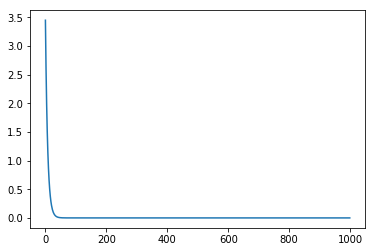

In [13]:
plt.plot(cost)


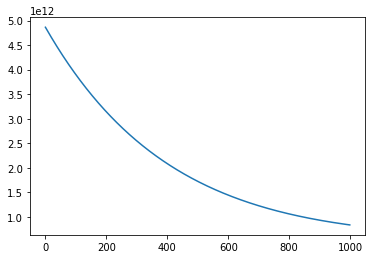

In [14]:
plt.plot(cost_2)

In [23]:
# SKLearn
X = np.array(x_df)
Y = np.array(y_df)
Y2 = np.array(y2_df)
# Sklearn linear_model y_1

y_1 = linear_model.LinearRegression()

y_1.fit(X,Y)

print('coefficient y_1:',y_1.coef_)

print('\n Intercept y_1:', y_1.intercept_)

# Sklearn linear_model y_2
y_2 = linear_model.LinearRegression()

y_2.fit(X,Y2)

print('\n coefficient y_2:',y_2.coef_)

print('\n Intercept y_2:', y_2.intercept_)


coefficient y_1: [485602.43253516  27829.72253896 616795.89509692]

 Intercept y_1: 396814.899277841

 coefficient y_2: [ 1.40174838 -0.12238693  0.1345496 ]

 Intercept y_2: 1.5857088559483057
